In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import bicgstab
import Reader as rd
from glob import glob
import matplotlib.patches as patches
import pandas as pd
import math
from scipy.misc import imread


import os

In [2]:
def e_neighbour_graph(img, e):
    array = np.array(img)
    rowN = np.shape(array)[0]
    colN = np.shape(array)[1]
    result = np.zeros((rowN * colN, rowN * colN))
    for row in range(rowN):
        for col in range(colN):
            for rowDiff in range(-e, e + 1, 1):
                for colDiff in range(-e, e + 1, 1):
                    if(row + rowDiff < rowN and -1 < row + rowDiff and col + colDiff < colN and -1 < col + colDiff):
                        if(rowDiff * rowDiff + colDiff * colDiff <= e * e):
                            result[row * colN + col][(row + rowDiff) * colN + (col + colDiff)] = 1
    return result


def fully_connected_graph(img, sigma):
    array = np.array(img)
    rowN = np.shape(array)[0]
    colN = np.shape(array)[1]
    result = np.zeros((rowN * colN, rowN * colN))
    for row in range(rowN):
        for col in range(colN):
            for row2 in range(rowN):
                for col2 in range(colN):
                    weight = math.exp(- math.pow(img[row][col] - img[row2][col2], 2) / (2 * math.pow(sigma, 2)))
                    result[row * colN + col][row2 * colN + col2] = weight
    return result


def fully_connected_e_neighbour_graph(img, sigma, e):
    array = np.array(img)
    rowN = np.shape(array)[0]
    colN = np.shape(array)[1]
    result = np.zeros((rowN * colN, rowN * colN))
    for row in range(rowN):
        for col in range(colN):
            for rowDiff in range(-e, e + 1, 1):
                for colDiff in range(-e, e + 1, 1):
                    if(row + rowDiff < rowN and -1 < row + rowDiff and col + colDiff < colN and -1 < col + colDiff):
                        if(rowDiff * rowDiff + colDiff * colDiff <= e * e):
                            row2 = row + rowDiff
                            col2 = col + colDiff
                            weight = math.exp(- math.pow(img[row][col] - img[row2][col2], 2) / (2 * math.pow(sigma, 2)))
                            result[row * colN + col][row2 * colN + col2] = weight
    return result
'''
# Check for graph implementations
ANGLE = 0 # 0-15, 0 is front, 8 is back
path_list = glob("./stage1_aps/*.aps")
path = path_list[0]
data = rd.read_data(path_list[0])
# we only get images from one certain angle
# img = np.rot90(data[:,:, ANGLE])
# imgplt = plt.imshow(img)
plt.show()


img2 = imread("./sample.jpg")
img2 = np.asarray(img2,np.dtype(np.int32))
# plt.imshow(img2)
# plt.show()
A = np.array([[1,2,3], [0,5,6]])
# A = img2
print("Image")
print(np.shape(A))
print(A)
print("e neighbour graph")
print(e_neighbour_graph(A, 1))
print("Fully connected & e neighbour graph")
print(np.round(fully_connected_e_neighbour_graph(A, 1, 1), decimals=2))
print("Fully connected graph")
print(np.round(fully_connected_graph(A, 1), decimals=2))
'''


def laplacian(graph):
    diag = np.diag(sum(graph))
    lap = diag - graph
    return [lap, diag]


def orthogonalize(diag, s):
    nodeNum = len(diag)
    p = np.ones((nodeNum, 1)) / pow(sum(np.diag(np.diag(sum(diag)))), .5)
    projection = np.dot(np.transpose(s), np.dot(diag, p))
    v = s - projection[0][0] * p
    # return [v, projection]
    return v


def PRwalk(graph, alpha, s):
    if alpha < 0:
        print('Error: alpha must be positive!')
        return -1
    nodeNum = len(graph)
    [L, D] = laplacian(graph)
    s = orthogonalize(D, s)
    v, flag = bicgstab((L + alpha * D), np.dot(D, s),tol=1e-3, maxiter=nodeNum)

    v = np.reshape(v, (len(v), 1))

    v = orthogonalize(D, v)
    return v

# Check for method implementations
# A = np.array([[1, 2, 3], [1, 5, 6]])
# G = np.round(fully_connected_e_neighbour_graph(A, 10, 1), decimals=1)
# print("Laplacian Check")
# [L, D] = laplacian(G)
# print(L)
# print(D)
# print("Orthogonalize check")
# A = np.array([2,3,3])
# D = np.diag(A)
# s = np.array([[1], [2], [3]])
# t = orthogonalize(D, s)
# print(t)
# print("PRwalk check")
# G = np.array([[0, 1], [1, 0]])
# s = np.array([[1], [2]])
# print(PRwalk(G, 1, s)) # output should be [[-0.167], [ 0.167]]

def normalize(D, s):
    norm = np.dot(np.dot(np.transpose(s), D), s)
    v = s/math.sqrt(norm)
    return v


In [8]:
# '''
myImg = np.asarray(imread("1a10297e6c3101af33003e6c4f846f47/1a10297e6c3101af33003e6c4f846f47.aps.jpg"), dtype=np.int)
# print(myImg)
# print(myImg.shape) # 148 row, 176 columns
graph = fully_connected_e_neighbour_graph(myImg, 5, 3)
seed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))
# seed[40 * myImg.shape[1] + 90][0] = 1 # Example seed
seed[74 * myImg.shape[1] + 88][0] = 1 # Example middle seed
'''
myImg = np.asarray(imread("3a8696b99b2d1b28be62389d48d697be/3a8696b99b2d1b28be62389d48d697be.aps.jpg"), dtype=np.int)
graph = fully_connected_e_neighbour_graph(myImg, 5, 3)
print(myImg.shape)
# print(np.round(graph, decimals=3))
seed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))
# seed[20 * myImg.shape[1] + 65][0] = 1 # Example seed
seed[70 * myImg.shape[1] + 70][0] = 1 # Example middle seed

myImg = np.asarray(imread("0cc6fc725d4b8818415ddc06823fce98.aps.jpg"), dtype=np.int)
graph = fully_connected_e_neighbour_graph(myImg, 5, 3)
print(myImg.shape)
# print(np.round(graph, decimals=3))
seed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))
seed[70 * myImg.shape[1] + 78][0] = 1 # Example seed
# seed[70 * myImg.shape[1] + 70][0] = 1 # Example middle seed
'''

'\nmyImg = np.asarray(imread("3a8696b99b2d1b28be62389d48d697be/3a8696b99b2d1b28be62389d48d697be.aps.jpg"), dtype=np.int)\ngraph = fully_connected_e_neighbour_graph(myImg, 5, 3)\nprint(myImg.shape)\n# print(np.round(graph, decimals=3))\nseed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))\n# seed[20 * myImg.shape[1] + 65][0] = 1 # Example seed\nseed[70 * myImg.shape[1] + 70][0] = 1 # Example middle seed\n\nmyImg = np.asarray(imread("0cc6fc725d4b8818415ddc06823fce98.aps.jpg"), dtype=np.int)\ngraph = fully_connected_e_neighbour_graph(myImg, 5, 3)\nprint(myImg.shape)\n# print(np.round(graph, decimals=3))\nseed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))\nseed[70 * myImg.shape[1] + 78][0] = 1 # Example seed\n# seed[70 * myImg.shape[1] + 70][0] = 1 # Example middle seed\n'

In [24]:
SeedList = [[40,90],[40,65],[45,123],[30,100]]
for i in range(0, myImg.shape[0], 37):
    for j in range(0, myImg.shape[1], 37):
        SeedList.append([i,j])
scoreList = []
for elem in SeedList:
    point = elem[0] * myImg.shape[1] + elem[1]
    seed = np.zeros((myImg.shape[0] * myImg.shape[1], 1))
    seed[point] = 1
    [L, D] = laplacian(graph)
    s = orthogonalize(D, seed)
    s = normalize(D, s)
    alpha = .001
    v = PRwalk(graph, alpha, s)
    normalization = (np.dot(np.dot(np.transpose(v), D), v))[0][0]
    # print(normalization)
    correlation = (np.dot(np.dot(np.dot(np.transpose(v), D), s), np.dot(np.dot(np.transpose(v), D), s)) / normalization)[0][0]
    # print(correlation)

    while correlation < 1 / len(graph):
        alpha = 2 * alpha
        v = PRwalk(graph, alpha, s)
        normalization = (np.dot(np.dot(np.transpose(v), D), v))[0][0]
        correlation = \
            (np.dot(np.dot(np.dot(np.transpose(v), D), s), np.dot(np.dot(np.transpose(v), D), s)) / normalization)[0][0]
        print(correlation)
        
    Ps = np.copy(v[:,0])
    if(v[point] <= 0):
        print('Negative!')
        Ps = -1 * Ps
    for i in range(len(Ps)):
        if(Ps[i] < 0):
            Ps[i] = 0
    Ps = Ps / sum(Ps)
    # Flattening image
    imgArray = np.zeros(myImg.shape[0] * myImg.shape[1])
    for i in range(myImg.shape[0]):
        for j in range(myImg.shape[1]):
            imgArray[i * myImg.shape[1] + j] = myImg[i][j]
    LValues = np.argsort(-Ps)
    numerator = 0
    denominator = 0
    for i in range(3500):
        numerator += Ps[LValues[i]] * imgArray[LValues[i]]
        denominator += Ps[LValues[i]]
    score = numerator / math.sqrt(denominator)
    scoreList.append(score)
    print('Point: [' + str(elem[0]) + ', ' + str(elem[1]) + '] Score: ' + str(score))

Point: [40, 90] Score: 21.2776339174
Point: [40, 65] Score: 21.4722244287
Point: [45, 123] Score: 19.9086696969
Point: [30, 100] Score: 21.3908910736
Point: [0, 0] Score: 16.4532700055
Point: [0, 37] Score: 27.3096805137
Point: [0, 74] Score: 59.2420781858
Point: [0, 111] Score: 38.9309820123
Point: [0, 148] Score: 28.1091361607
Point: [37, 0] Score: 11.6581617338
Point: [37, 37] Score: 39.5678046245
Point: [37, 74] Score: 21.8967392999
Point: [37, 111] Score: 20.4657402577
Point: [37, 148] Score: 26.511958167
Point: [74, 0] Score: 6.50363962426
Point: [74, 37] Score: 35.6554487003
Point: [74, 74] Score: 76.5142917687
Point: [74, 111] Score: 76.5256479207
Point: [74, 148] Score: 18.1527944499
Point: [111, 0] Score: 5.54282656506
Point: [111, 37] Score: 11.7592900593
Point: [111, 74] Score: 88.163750081
Point: [111, 111] Score: 75.2882882629
Point: [111, 148] Score: 8.8858683576


In [79]:
[L, D] = laplacian(graph)
s = orthogonalize(D, seed)
s = normalize(D, s)
alpha = .001
v = PRwalk(graph, alpha, s)
normalization = (np.dot(np.dot(np.transpose(v), D), v))[0][0]
print(normalization)
correlation = (np.dot(np.dot(np.dot(np.transpose(v), D), s), np.dot(np.dot(np.transpose(v), D), s)) / normalization)[0][0]
print(correlation)

while correlation < 1 / len(graph):
    alpha = 2 * alpha
    v = PRwalk(graph, alpha, s)
    normalization = (np.dot(np.dot(np.transpose(v), D), v))[0][0]
    correlation = \
        (np.dot(np.dot(np.dot(np.transpose(v), D), s), np.dot(np.dot(np.transpose(v), D), s)) / normalization)[0][0]
    print(correlation)

109.370271349
0.0235638565228


In [87]:
v[74 * myImg.shape[1] + 88]
min(v)

array([-0.00625094])

In [85]:
Ps = np.copy(v[:,0])
for i in range(len(Ps)):
    if(Ps[i] < 0):
        Ps[i] = 0
print(Ps[74 * myImg.shape[1] + 88])
Ps = Ps / sum(Ps)
# Flattening image
imgArray = np.zeros(myImg.shape[0] * myImg.shape[1])
for i in range(myImg.shape[0]):
    for j in range(myImg.shape[1]):
        imgArray[i * myImg.shape[1] + j] = myImg[i][j]
LValues = np.argsort(-Ps)

0.0
0.380390937484


In [84]:
sum(Ps)

1.0000000000000009

In [75]:
plt.plot(Ps[list(LValues)])
plt.axis([0, 3500, 0, .0005])
# plt.show()
plt.savefig('ScoreCalculation/SeedOutThreadProbabilitySortingZoomed.eps')
# 1a10297e6c3101af33003e6c4f846f47
# L is chosen to be 2500 for seed in  threat
# L is chosen to be 3500 for seed out threat
# 3a8696b99b2d1b28be62389d48d697be
# L is chosen to be 2500 for seed in  threat
# L is chosen to be 3500 for seed out threat

In [86]:
numerator = 0
denominator = 0
for i in range(3500):
    numerator += Ps[LValues[i]] * imgArray[LValues[i]]
    denominator += Ps[LValues[i]]
score = numerator / math.sqrt(denominator)
score
# 1a10297e6c3101af33003e6c4f846f47
# Score for seed in  threat is 20.92396
# Score for seed out threat is 78.89822
# 3a8696b99b2d1b28be62389d48d697be
# Score for seed in  threat is 47.65544
# Score for seed out threat is 96.64295

78.898223757060279

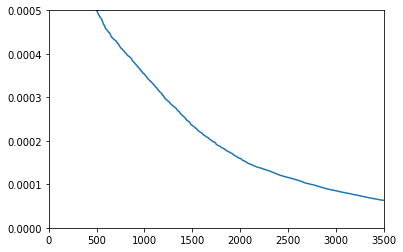

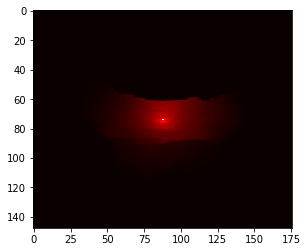

In [47]:
heat = np.zeros(myImg.shape)
for i in range(myImg.shape[0]):
    for j in range(myImg.shape[1]):
        heat[i][j] = Ps[i * myImg.shape[1] + j]
plt.show()
plt.imshow(heat, cmap='hot', interpolation='nearest')
plt.show()

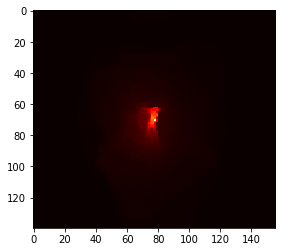

In [122]:
heat = np.zeros(myImg.shape)
for i in range(myImg.shape[0]):
    for j in range(myImg.shape[1]):
        heat[i][j] = v[i * myImg.shape[1] + j]
# plt.show()
# plt.imshow(myImg)
# plt.imshow(heat, cmap='hot', interpolation='nearest')
# plt.imshow(heat, cmap='hot', interpolation='nearest', alpha = .65)
# plt.savefig('0cc6fc725d4b8818415ddc06823fce98/RW_cropped_superimposed_MiddlePointSeed.eps')

(140, 156)
(660, 512)


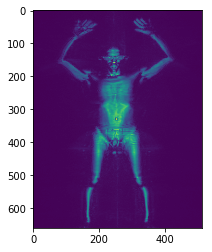

In [124]:
data = rd.read_data("0cc6fc725d4b8818415ddc06823fce98/0cc6fc725d4b8818415ddc06823fce98.aps")
img = np.rot90(data[:, :, 0])
myImgFull = np.asarray(img, dtype=np.double)
heat = np.zeros(myImgFull.shape)
for i in range(myImg.shape[0]):
    for j in range(myImg.shape[1]):
        heat[199 + i][180 + j] = v[i * myImg.shape[1] + j]
print(myImg.shape)
print(heat.shape)
plt.show()
plt.imshow(myImgFull)
# plt.savefig('0cc6fc725d4b8818415ddc06823fce98/FullImage.eps')
plt.imshow(heat, cmap='hot', interpolation='nearest',alpha = .6)
plt.savefig('0cc6fc725d4b8818415ddc06823fce98/RW_FullImage.eps')